# 📘 College Student Placement Dataset

A realistic, large-scale synthetic dataset of **10,000 students** designed to analyze factors affecting college placements.

---

## 📄 Dataset Description

This dataset simulates the academic and professional profiles of 10,000 college students, focusing on factors that influence placement outcomes.  
It includes features like IQ, academic performance, CGPA, internships, communication skills, and more.

**Ideal for:**
- Predictive modeling of placement outcomes
- Educational exercises in classification
- Feature importance analysis
- End-to-end machine learning projects

---

## 📊 Columns Description

| Column Name              | Description |
|--------------------------|-------------|
| **College_ID**           | Unique ID of the college (e.g., CLG0001 to CLG0100) |
| **IQ**                   | Student’s IQ score (normally distributed around 100) |
| **Prev_Sem_Result**      | GPA from the previous semester (range: 5.0 to 10.0) |
| **CGPA**                 | Cumulative Grade Point Average (range: ~5.0 to 10.0) |
| **Academic_Performance** | Annual academic rating (scale: 1 to 10) |
| **Internship_Experience**| Whether the student has completed any internship (Yes/No) |
| **Extra_Curricular_Score**| Involvement in extracurriculars (score from 0 to 10) |
| **Communication_Skills** | Soft skill rating (scale: 1 to 10) |
| **Projects_Completed**   | Number of academic/technical projects completed (0 to 5) |
| **Placement**            | Final placement result (`Yes` = Placed, `No` = Not Placed) |

---

## 🎯 Target Variable
**Placement** – Binary classification target:  
- `Yes` → Placed  
- `No` → Not Placed

---

## 🧠 Use Cases

- 📈 **Classification Modeling** (Logistic Regression, Decision Trees, Random Forest, etc.)
- 🔍 **Exploratory Data Analysis (EDA)**
- 🎯 **Feature Engineering and Selection**
- 🧪 **Model Evaluation Practice**
- 👩‍🏫 **Academic Projects & Capstone Use**

---

## 📦 Dataset Size
- **Rows:** 10,000  
- **Columns:** 10  
- **File Format:** `.csv`

---

## 📚 Context

This dataset was generated to resemble real-world data in academic institutions for research and machine learning use.  
While it is synthetic, the variables and relationships are crafted to mimic authentic trends observed in student placements.

---

## 📜 License
**MIT License**

---

## 🔗 Source
Created using Python (**NumPy, Pandas**) with data logic designed for educational and ML experimentation purposes.


# Import Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

#  Load & Inspect Dataset

In [2]:
df = pd.read_csv('college_student_placement_dataset.csv')

In [3]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
df.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [5]:
df.isnull().sum().sum()

np.int64(0)

In [17]:
df.duplicated().sum()

np.int64(0)

Dataset has no null values and duplicated values

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IQ,10000.0,99.471800,15.053101,41.00,89.00,99.00,110.00,158.0
Prev_Sem_Result,10000.0,7.535673,1.447519,5.00,6.29,7.56,8.79,10.0
CGPA,10000.0,7.528296,1.462917,4.54,6.29,7.55,8.77,10.0
Academic_Performance,10000.0,5.546400,2.873477,1.00,3.00,6.00,8.00,10.0
Extra_Curricular_Score,10000.0,4.970900,3.160103,0.00,2.00,5.00,8.00,10.0
Communication_Skills,10000.0,5.561800,2.900866,1.00,3.00,6.00,8.00,10.0
Projects_Completed,10000.0,2.513400,1.715959,0.00,1.00,3.00,4.00,5.0


# Exploratory Data Analysis (EDA)

## Data Cleaning

In [8]:
df.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [21]:
print(df[df['CGPA']>10].shape[0])
print(df[df['Prev_Sem_Result']>10].shape[0])

249
0


In [23]:
df.loc[df['CGPA'] > 10, 'CGPA'] = 10

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


## Insights

Let's understand distributions of numeric columns

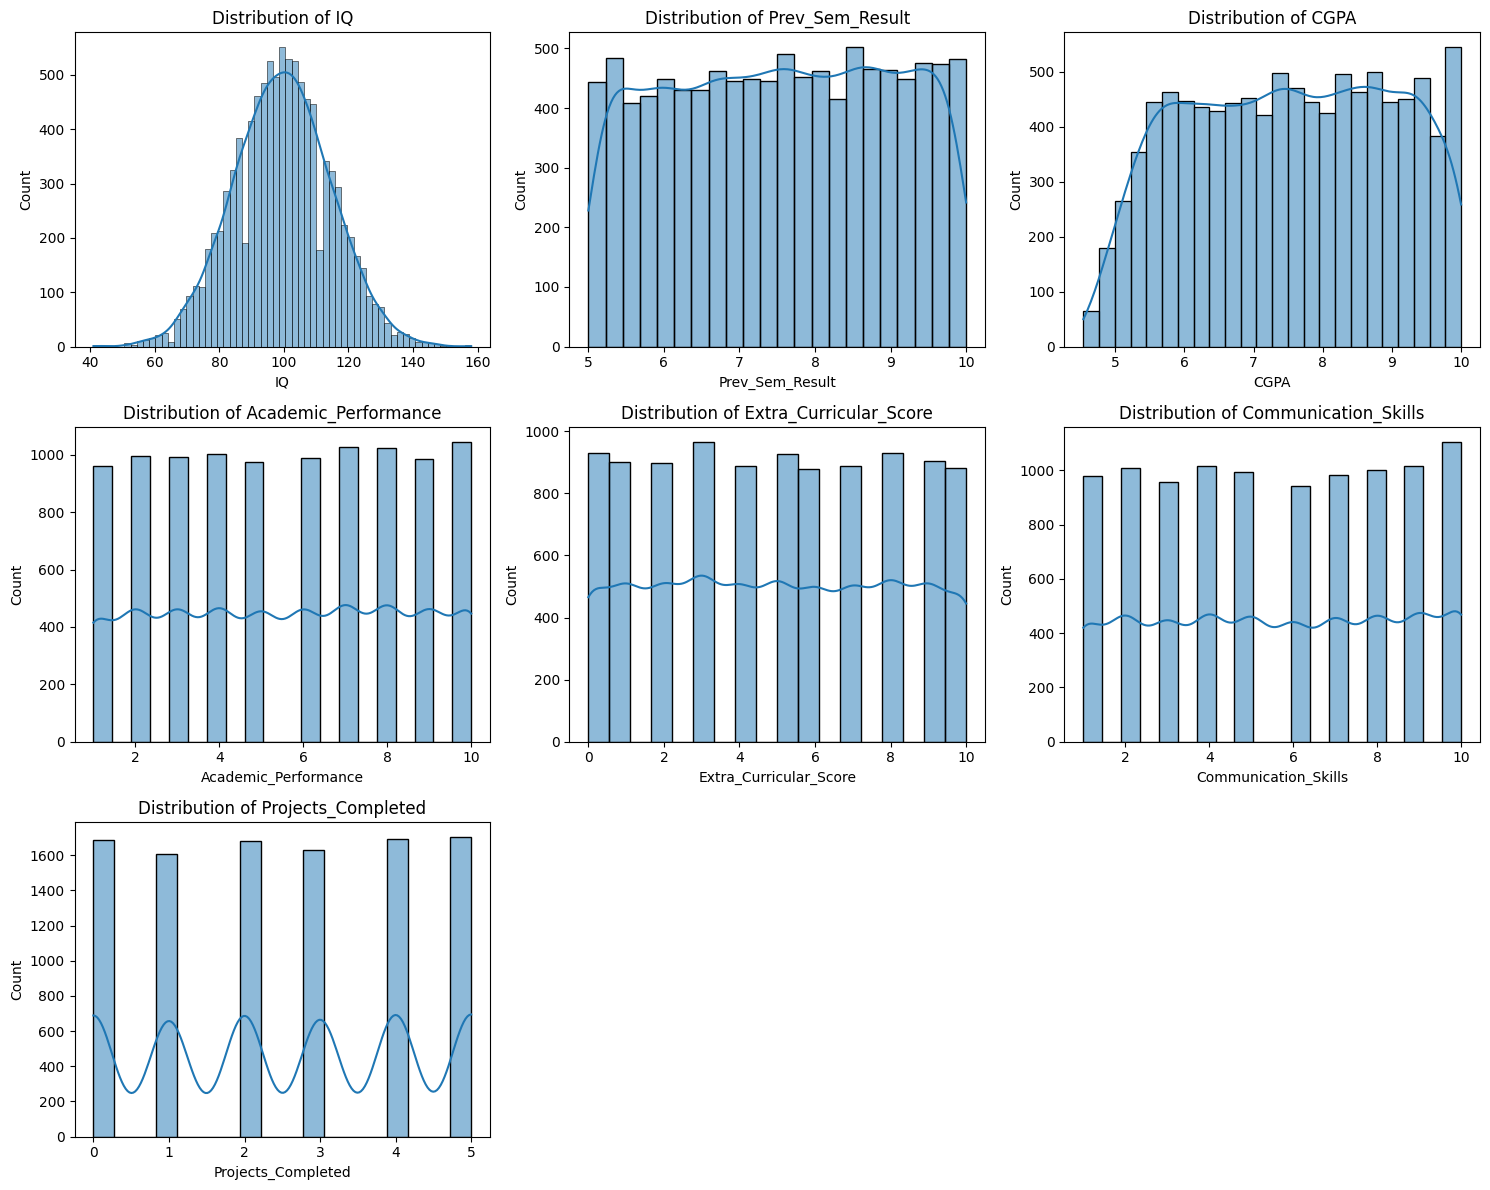

In [34]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = -(-len(num_cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribution of {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [35]:
df['Placement'].value_counts()

,count
Placement,
No,8341
Yes,1659


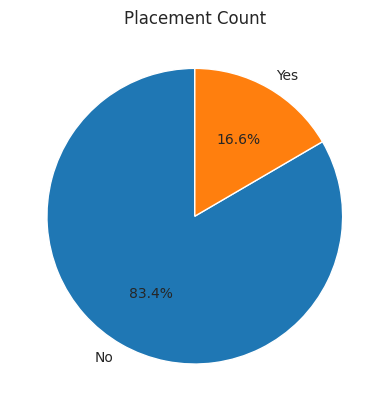

In [52]:
# Placement Count
placement_count = df['Placement'].value_counts()
plt.title('Placement Count')
plt.pie(placement_count,labels=placement_count.index,autopct='%1.1f%%',startangle=90)
sns.color_palette('pastel')
plt.show()

In [55]:
df['Placement'] = df['Placement'].map({'Yes':1,'No':0})
df['Internship_Experience'] = df['Internship_Experience'].map({'Yes':1,'No':0})

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  int64  
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [59]:
df.drop(columns = 'College_ID', axis=1, inplace=True)

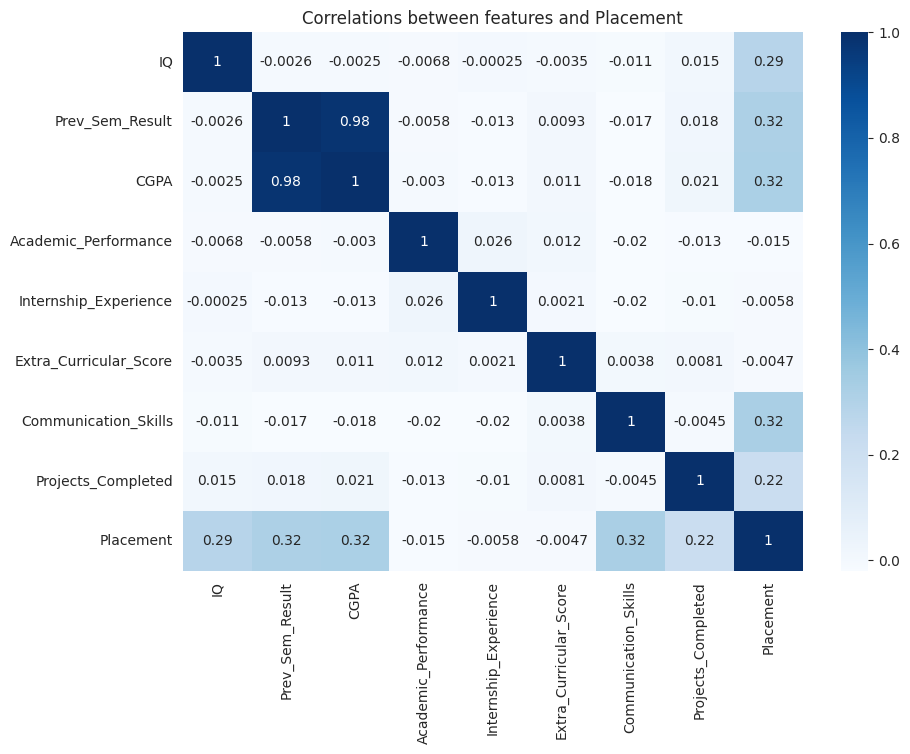

In [64]:
# Correlations between features and Placement
plt.figure(figsize=(10, 7))
plt.title('Correlations between features and Placement')
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [68]:
df.corr(numeric_only=True)['Placement'].sort_values(ascending=False).head(6)

,Placement
Placement,1.000000
Communication_Skills,0.323155
CGPA,0.321898
Prev_Sem_Result,0.317896
IQ,0.285914
Projects_Completed,0.217499


0.28–0.35 is a moderate positive correlation.
That means those features tend to be somewhat predictive of placement — higher values often align with a higher chance of getting placed, but it’s not a perfect rule.

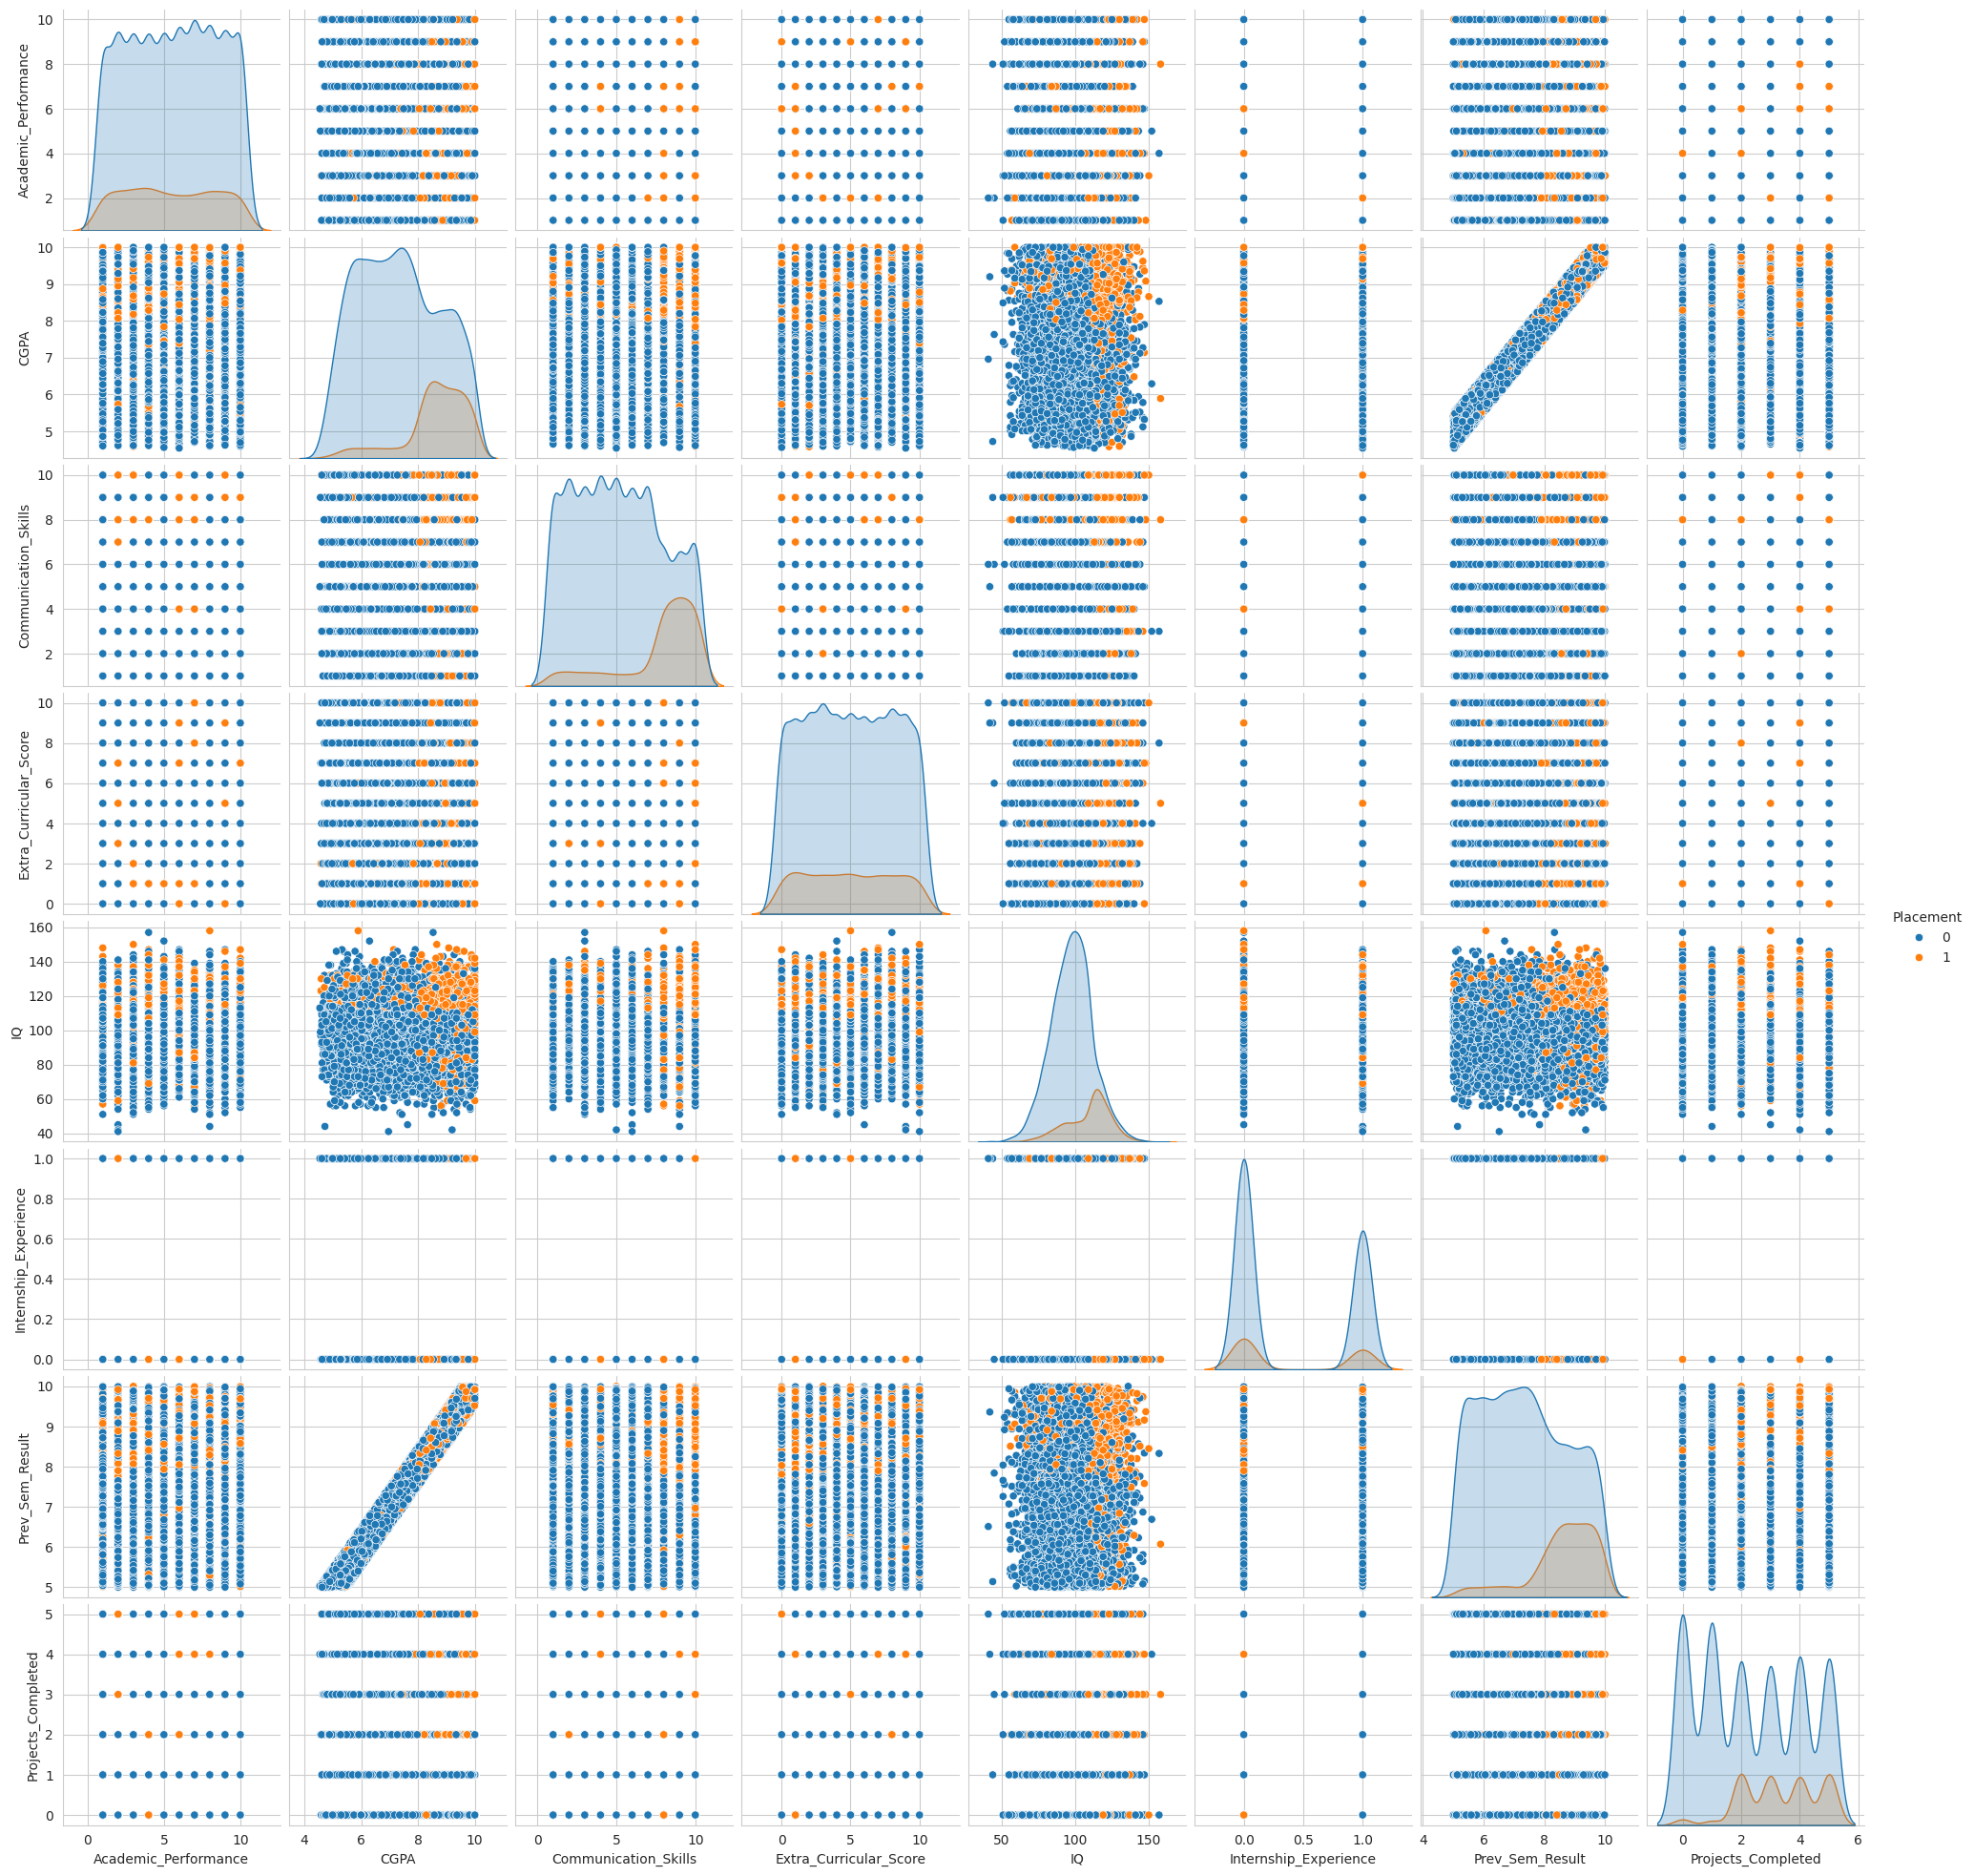

In [69]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df[num_cols.union(['Placement'])], hue='Placement', diag_kind='kde')
plt.show()

# Data Preprocessing

In [70]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0


In [71]:
# features and target
x = df.drop(columns='Placement',axis=1)
y = df['Placement']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [74]:
# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [77]:
print("Before SMOTE:", y_train.value_counts(normalize=True)*100)
print("After SMOTE:", y_train_res.value_counts(normalize=True)*100)

Before SMOTE: Placement
0    83.4125
1    16.5875
Name: proportion, dtype: float64
After SMOTE: Placement
0    50.0
1    50.0
Name: proportion, dtype: float64


In [79]:
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


# Model Training

In [103]:
results = []
acc_list = []

In [104]:
def add_results(results_list, acc_list, model_name, y_train, y_train_pred, y_test, y_test_pred):
    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1': f1_score(y_test, y_test_pred)
    })

    acc_list.append({
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred)
    })


## Logistic Regression

In [105]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_res_scaled, y_train_res)

y_train_pred = log_reg.predict(X_train_res_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

add_results(results, acc_list, 'Logistic Regression', y_train_res, y_train_pred, y_test, y_test_pred)


## Decision Tree

In [106]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)

y_train_pred = dt.predict(X_train_res)
y_test_pred = dt.predict(X_test)

add_results(results, acc_list, 'Decision Tree', y_train_res, y_train_pred, y_test, y_test_pred)

## SVM

In [107]:
svm_clf = SVC()
svm_clf.fit(X_train_res_scaled, y_train_res)

y_train_pred = svm_clf.predict(X_train_res_scaled)
y_test_pred = svm_clf.predict(X_test_scaled)

add_results(results, acc_list, 'SVM', y_train_res, y_train_pred, y_test, y_test_pred)

## KNN

In [108]:
knn = KNeighborsClassifier()
knn.fit(X_train_res_scaled, y_train_res)

y_train_pred = knn.predict(X_train_res_scaled)
y_test_pred = knn.predict(X_test_scaled)

add_results(results, acc_list, 'KNN', y_train_res, y_train_pred, y_test, y_test_pred)

## Random Forest

In [109]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)

y_train_pred = rf.predict(X_train_res)
y_test_pred = rf.predict(X_test)

add_results(results, acc_list, 'Random Forest', y_train_res, y_train_pred, y_test, y_test_pred)

In [92]:
results

[{'Model': 'Logistic Regression',
  'Accuracy': 0.855,
  'Precision': 0.5399239543726235,
  'Recall': 0.8554216867469879,
  'F1': 0.662004662004662},
 {'Model': 'Decision Tree',
  'Accuracy': 0.999,
  'Precision': 0.9940119760479041,
  'Recall': 1.0,
  'F1': 0.996996996996997},
 {'Model': 'SVM',
  'Accuracy': 0.9405,
  'Precision': 0.7482517482517482,
  'Recall': 0.9668674698795181,
  'F1': 0.8436268068331143},
 {'Model': 'KNN',
  'Accuracy': 0.9105,
  'Precision': 0.6645161290322581,
  'Recall': 0.9307228915662651,
  'F1': 0.7754077791718946},
 {'Model': 'Random Forest',
  'Accuracy': 0.9995,
  'Precision': 0.996996996996997,
  'Recall': 1.0,
  'F1': 0.9984962406015038}]

## XGBOOST

In [110]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_res, y_train_res)

y_train_pred = xgb.predict(X_train_res)
y_test_pred = xgb.predict(X_test)

add_results(results, acc_list, 'XGBoost', y_train_res, y_train_pred, y_test, y_test_pred)

## Result

In [111]:
results_df = pd.DataFrame(results).sort_values(by='F1', ascending=False)
results_df.head(6)

,Model,Accuracy,Precision,Recall,F1
4,Random Forest,0.9995,0.996997,1.000000,0.998496
1,Decision Tree,0.9990,0.994012,1.000000,0.996997
5,XGBoost,0.9975,0.988060,0.996988,0.992504
2,SVM,0.9405,0.748252,0.966867,0.843627
3,KNN,0.9105,0.664516,0.930723,0.775408
0,Logistic Regression,0.8550,0.539924,0.855422,0.662005


In [113]:
acc_df = pd.DataFrame(acc_list).sort_values(by='Test Accuracy', ascending=False)
acc_df.head(6)

,Model,Train Accuracy,Test Accuracy
4,Random Forest,1.000000,0.9995
1,Decision Tree,1.000000,0.9990
5,XGBoost,1.000000,0.9975
2,SVM,0.958040,0.9405
3,KNN,0.963210,0.9105
0,Logistic Regression,0.854413,0.8550


# Summary

**Top performers:**

- Random Forest, Decision Tree, XGBoost — All have Train Accuracy = 1.0 and Test Accuracy > 0.997.

- Likely because the synthetic dataset is highly separable after SMOTE.

- In real-world scenarios, this could mean overfitting, but here it’s not harming performance on the test set.

**Mid-range performers:**

- SVM and KNN — Good generalization with small accuracy drop from train to test.

**Lower performer:**

- Logistic Regression — Simpler model, less accuracy, but stable.

# Save Models

In [114]:
import joblib

joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(log_reg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']